# Set Up Env

In [1]:
!pip install numpy==1.22.4

In [2]:
!pip install scipy==1.9.1

In [3]:
import sys
import os

import sagemaker
from sagemaker import get_execution_role

# Add the parent directory to the sys.path
sys.path.insert(0, os.path.abspath('..'))

# Define IAM role
role = get_execution_role()
role

# Establish S3 bucket connection
import boto3
s3 = boto3.client('s3')
bucket = 'capstone-bucket-4-friends'

print(os.getcwd())

from file_utilities import s3_download 

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
/home/sagemaker-user/capstone-2024-summer/src/jenna/phase_2


In [4]:
# standard libraries
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
!pip install seaborn -q
import seaborn as sns

# Load dataset

In [5]:
#crsp_and_comp = "CRSP/sp500_crsp_compustat_merged_2018_2023.csv"
#crsp_and_comp_path = s3_download(crsp_and_comp)

In [6]:
#index = "Index/security_master.csv"
#index_path = s3_download(index)

In [7]:
crsp_and_comp_df = pd.read_csv(
    "/home/sagemaker-user/capstone-2024-summer/src/jenna/data_download/sp500_crsp_compustat_merged_2018_2023.csv",
    parse_dates=["date"],
)

crsp_and_comp_df.head()

/tmp/ipykernel_2939/344306147.py:1: DtypeWarning: Columns (0,21,25,26,27,28,29,30,31,32,33,37,38,39,40,43,44,45,46,47,52,53,54,55,657,658) have mixed types. Specify dtype option on import or set low_memory=False.
  crsp_and_comp_df = pd.read_csv(


,cusip,permno,permco,issuno,hexcd,hsiccd,date,bidlo,askhi,prc,...,prccq,prchq,prclq,adjex,naics,shrcd,exchcd,trdstat,primexch,secstat
0,68389X10,10104,8045,10536,1,7379,2018-01-02,46.170,47.8011,46.63,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R
1,68389X10,10104,8045,10536,1,7379,2018-01-03,47.440,48.0700,47.71,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R
2,68389X10,10104,8045,10536,1,7379,2018-01-04,47.715,48.1900,48.18,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R
3,68389X10,10104,8045,10536,1,7379,2018-01-05,48.280,48.6300,48.47,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R
4,68389X10,10104,8045,10536,1,7379,2018-01-08,47.940,49.0700,48.98,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R


In [8]:
crsp_and_comp_df.shape

(828593, 673)

In [9]:
crsp_and_comp_df.dtypes

cusip       object
permno       int64
permco       int64
issuno       int64
hexcd        int64
             ...  
shrcd        int64
exchcd       int64
trdstat     object
primexch    object
secstat     object
Length: 673, dtype: object

In [10]:
og_len = len(crsp_and_comp_df)
og_cols = len(crsp_and_comp_df.columns)
print("Number of records:", og_len)
print("Number of columns:", og_cols)

Number of records: 828593
Number of columns: 673


In [11]:
crsp_and_comp_df.columns.tolist()

['cusip',
 'permno',
 'permco',
 'issuno',
 'hexcd',
 'hsiccd',
 'date',
 'bidlo',
 'askhi',
 'prc',
 'vol',
 'ret',
 'bid',
 'ask',
 'shrout',
 'cfacpr',
 'cfacshr',
 'openprc',
 'numtrd',
 'retx',
 'gvkey',
 'datadate',
 'fyearq',
 'fqtr',
 'fyr',
 'indfmt',
 'consol',
 'popsrc',
 'datafmt',
 'tic',
 'cusip.1',
 'conm',
 'acctchgq',
 'acctstdq',
 'adrrq',
 'ajexq',
 'ajpq',
 'bsprq',
 'compstq',
 'curcdq',
 'curncdq',
 'currtrq',
 'curuscnq',
 'datacqtr',
 'datafqtr',
 'finalq',
 'ogmq',
 'rp',
 'scfq',
 'srcq',
 'staltq',
 'updq',
 'apdedateq',
 'fdateq',
 'pdateq',
 'rdq',
 'acchgq',
 'acomincq',
 'acoq',
 'actq',
 'altoq',
 'ancq',
 'anoq',
 'aociderglq',
 'aociotherq',
 'aocipenq',
 'aocisecglq',
 'aol2q',
 'aoq',
 'apq',
 'aqaq',
 'aqdq',
 'aqepsq',
 'aqpl1q',
 'aqpq',
 'arcedq',
 'arceepsq',
 'arceq',
 'atq',
 'aul3q',
 'billexceq',
 'capr1q',
 'capr2q',
 'capr3q',
 'capsftq',
 'capsq',
 'ceiexbillq',
 'ceqq',
 'cheq',
 'chq',
 'cibegniq',
 'cicurrq',
 'ciderglq',
 'cimiiq',
 '

# Null Analysis

In [12]:
# Count the number of nulls in each column
null_counts = crsp_and_comp_df.isnull().sum()

# Calculate the percentage of nulls in each column
total_rows = len(crsp_and_comp_df)
null_percentages = (null_counts / total_rows) * 100

In [13]:
null_table = crsp_and_comp_df.isnull().sum().reset_index()
null_table.columns = ["Column", "Null Values"]

# Add column to show the percentage of null values
null_table["Percentage"] = (null_table["Null Values"] / len(crsp_and_comp_df)) * 100

# Sorting the table by the number of null values in descending order
null_table_sorted = null_table.sort_values(by="Null Values", ascending=False).reset_index(drop=True)
null_table_sorted

,Column,Null Values,Percentage
0,spcep12,828593,100.0
1,prcpepsq,828593,100.0
2,rreps12,828593,100.0
3,rrdq,828593,100.0
4,rrd12,828593,100.0
...,...,...,...
668,hsiccd,0,0.0
669,hexcd,0,0.0
670,issuno,0,0.0
671,permco,0,0.0


## A1. Drop all columns which contains more than 80% null as they cannot be reasonably obtained or imputed.

In [14]:
og_cols = len(crsp_and_comp_df.columns)
columns_to_drop = null_percentages[null_percentages > 80].index
crsp_and_comp_df = crsp_and_comp_df.drop(columns=columns_to_drop)
new_cols = len(crsp_and_comp_df.columns)
print("Number of columns removed: ", og_cols - new_cols)
print("Number of columns kept:", new_cols)

Number of columns removed:  310
Number of columns kept: 363


In [15]:
crsp_and_comp_df.head()

,cusip,permno,permco,issuno,hexcd,hsiccd,date,bidlo,askhi,prc,...,prccq,prchq,prclq,adjex,naics,shrcd,exchcd,trdstat,primexch,secstat
0,68389X10,10104,8045,10536,1,7379,2018-01-02,46.170,47.8011,46.63,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R
1,68389X10,10104,8045,10536,1,7379,2018-01-03,47.440,48.0700,47.71,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R
2,68389X10,10104,8045,10536,1,7379,2018-01-04,47.715,48.1900,48.18,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R
3,68389X10,10104,8045,10536,1,7379,2018-01-05,48.280,48.6300,48.47,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R
4,68389X10,10104,8045,10536,1,7379,2018-01-08,47.940,49.0700,48.98,...,NaN,NaN,NaN,NaN,513210.0,11,1,A,N,R


In [16]:
crsp_and_comp_df.columns.tolist()

['cusip',
 'permno',
 'permco',
 'issuno',
 'hexcd',
 'hsiccd',
 'date',
 'bidlo',
 'askhi',
 'prc',
 'vol',
 'ret',
 'bid',
 'ask',
 'shrout',
 'cfacpr',
 'cfacshr',
 'openprc',
 'numtrd',
 'retx',
 'gvkey',
 'datadate',
 'fyearq',
 'fqtr',
 'fyr',
 'indfmt',
 'consol',
 'popsrc',
 'datafmt',
 'tic',
 'cusip.1',
 'conm',
 'acctstdq',
 'ajexq',
 'ajpq',
 'curcdq',
 'curncdq',
 'currtrq',
 'datacqtr',
 'datafqtr',
 'finalq',
 'rp',
 'scfq',
 'srcq',
 'updq',
 'apdedateq',
 'fdateq',
 'pdateq',
 'rdq',
 'acchgq',
 'acomincq',
 'acoq',
 'actq',
 'altoq',
 'ancq',
 'anoq',
 'aociderglq',
 'aociotherq',
 'aocipenq',
 'aocisecglq',
 'aol2q',
 'aoq',
 'apq',
 'aqaq',
 'aqdq',
 'aqepsq',
 'aqpl1q',
 'aqpq',
 'atq',
 'aul3q',
 'billexceq',
 'capsq',
 'ceqq',
 'cheq',
 'chq',
 'cibegniq',
 'cicurrq',
 'ciderglq',
 'cimiiq',
 'ciotherq',
 'cipenq',
 'ciq',
 'cisecglq',
 'citotalq',
 'cogsq',
 'csh12q',
 'cshfd12',
 'cshfdq',
 'cshiq',
 'cshopq',
 'cshoq',
 'cshprq',
 'cstkcvq',
 'cstkeq',
 'cstkq

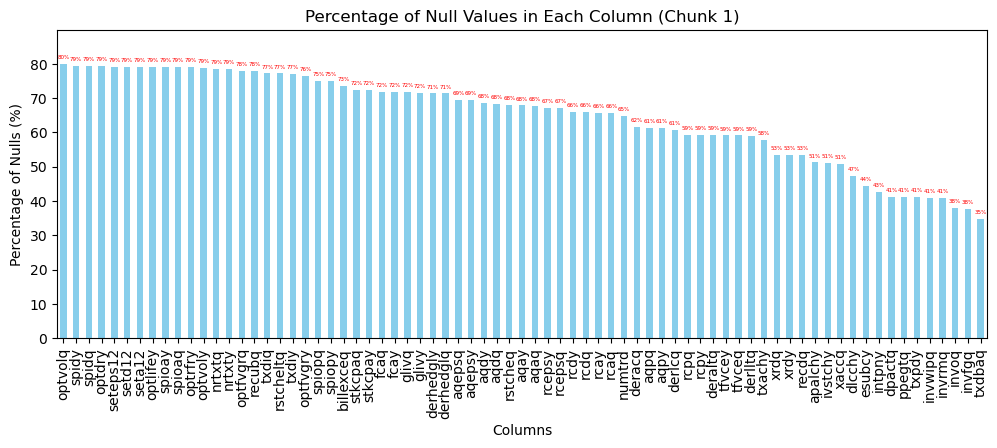

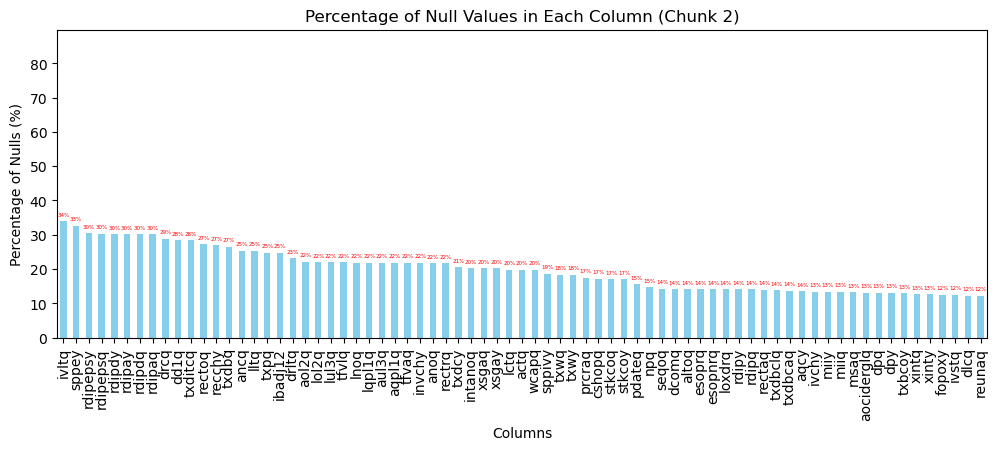

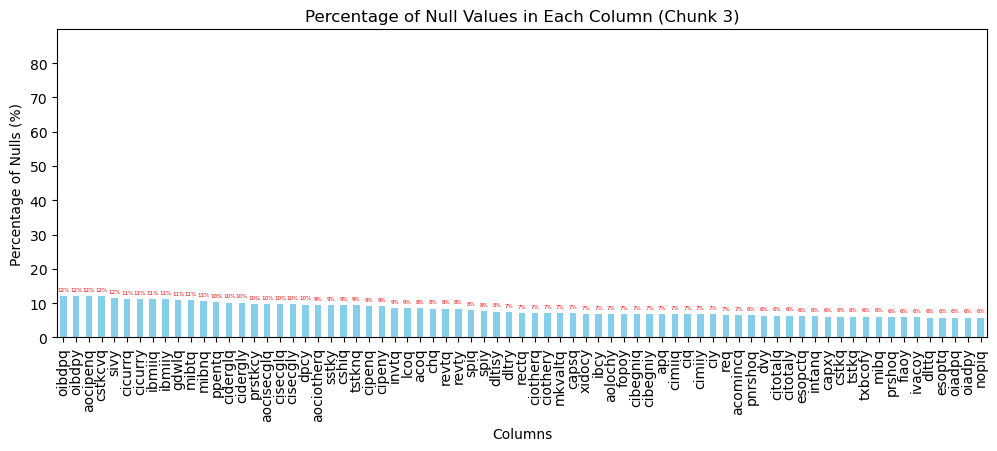

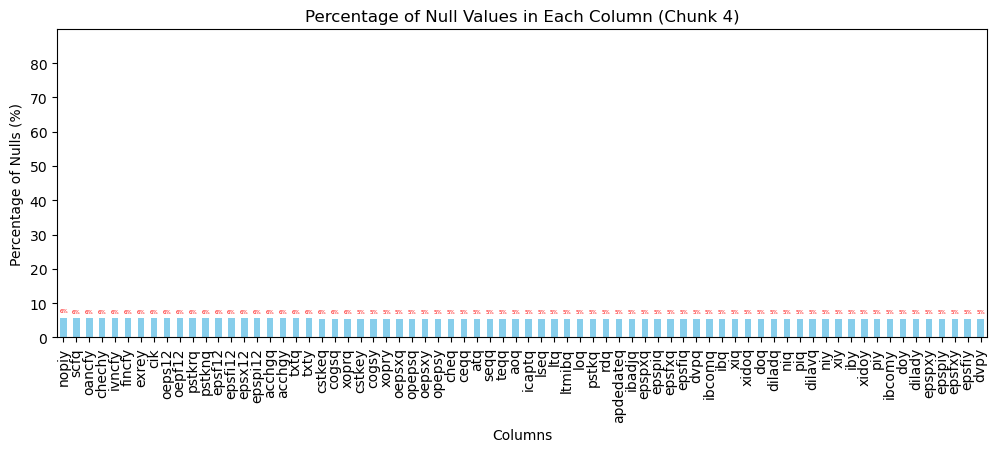

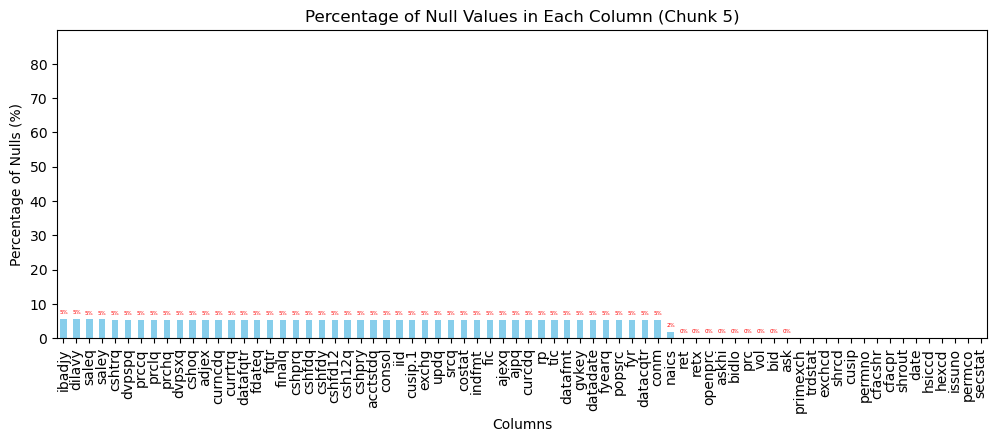

In [17]:
# Count the number of nulls in each column
null_counts = crsp_and_comp_df.isnull().sum()

# Calculate the percentage of nulls in each column
total_rows = len(crsp_and_comp_df)
null_percentages = (null_counts / total_rows) * 100
null_percentages = null_percentages.sort_values(ascending=False)

# Split the columns into 5 chunks
columns = null_percentages.index.tolist()
chunks = np.array_split(columns, 5)

# Plot each chunk separately
for i, chunk in enumerate(chunks):
    # Get the null percentages for the current chunk
    chunk_null_percentages = null_percentages[chunk]
    
    # Plot the percentages as a bar plot
    ax = chunk_null_percentages.plot(kind="bar", figsize=(12, 4), color="skyblue")
    plt.title(f"Percentage of Null Values in Each Column (Chunk {i+1})")
    plt.xlabel("Columns")
    plt.ylim(0, max(null_percentages.values) + 10)
    plt.ylabel("Percentage of Nulls (%)")
    
    # Annotate the bars with the percentage values
    for j, percentage in enumerate(chunk_null_percentages):
        if percentage != 0:
            ax.annotate(
                f"{percentage:.0f}%",
                xy=(j, percentage),
                xytext=(0, 3),
                textcoords="offset points",
                ha="center",
                va="bottom",
                color="red",
                fontsize=4
            )
    
    plt.show()

## Cast date variables

In [18]:
def date_formatting(df):
    """Convert to datetime"""
    date_columns = [
        "nameendt",
        "dclrdt",
        "dlpdt",
        "nextdt",
        "paydt",
        "rcrddt",
        "shrenddt",
        "datadate",
        "apdedateq",
        "fdateq",
        "pdateq",
        "rdq",
        "adjex",
        "ipodate",
    ]
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors="coerce")

date_formatting(crsp_and_comp_df)

## A2. Drop all columns containing duplicate information

In [19]:
og_cols = len(crsp_and_comp_df.columns)
columns_to_drop = [
    "permco",       # Dropped CRSP columns that Rachel dropped before
    "issuno",
    # "tsymbol",
    "retx",
    # "vwretx",
    # "ewretx",
    "hexcd",
    # "siccd",
    "hsiccd",
    # "hsicig",
    # "hsicmg",
    "gvkey",        # Used for merging, redundant after join
    "indfmt",       # Standard industrial format, usually constant
    "consol",       # Consolidation level, usually constant
    "popsrc",       # Population source, usually constant
    "datafmt",      # Data format, usually constant
    "exchg",        # Exchange code, CRSP has this information
    "prccq",        # Price data, if using CRSP's pricing information
    "ajexq",        # Adjustment factor, if using CRSP's adjustment factors
]
crsp_and_comp_df = crsp_and_comp_df.drop(columns=columns_to_drop)
new_cols = len(crsp_and_comp_df.columns)
print("Number of columns removed: ", og_cols - new_cols)
print("Number of columns kept:", new_cols)

Number of columns removed:  13
Number of columns kept: 350


## Null Check

In [20]:
null_table = crsp_and_comp_df.isnull().sum().reset_index()
null_table.columns = ["Column", "Null Values"]

# Add column to show the percentage of null values
null_table["Percentage"] = (null_table["Null Values"] / len(crsp_and_comp_df)) * 100

# Sorting the table by the number of null values in descending order
null_table_sorted = null_table.sort_values(by="Null Values", ascending=False).reset_index(drop=True)
null_table_sorted

,Column,Null Values,Percentage
0,optvolq,661513,79.835697
1,spidy,658376,79.457104
2,spidq,658123,79.426570
3,optdry,657919,79.401950
4,seteps12,656063,79.177956
...,...,...,...
345,cfacshr,0,0.000000
346,cfacpr,0,0.000000
347,shrout,0,0.000000
348,date,0,0.000000


# Review unique values and distribution in each remaining column

In [21]:
for column in crsp_and_comp_df.columns:
    print("-" * 10, column, "-" * 10)
    print(crsp_and_comp_df[column].nunique())
    print(crsp_and_comp_df[column].value_counts())

---------- cusip ----------
721
cusip
68389X10    1509
25746U10    1509
00724F10    1509
92857W30    1509
80851310    1509
            ... 
56584910      55
82880610      45
66877110      33
72348410      26
88320310      22
Name: count, Length: 721, dtype: int64
---------- permno ----------
568
permno
10104    1509
79103    1509
78034    1509
78975    1509
78981    1509
         ... 
89454     250
23570     249
77668     245
25778     213
89757     205
Name: count, Length: 568, dtype: int64
---------- date ----------
1509
date
2020-12-15    554
2020-12-09    554
2020-12-10    554
2020-12-11    554
2020-12-14    554
             ... 
2018-01-26    539
2018-01-29    539
2018-01-30    539
2018-01-31    539
2018-01-02    539
Name: count, Length: 1509, dtype: int64
---------- bidlo ----------
137123
bidlo
85.00000     95
68.00000     94
75.50000     94
56.00000     94
75.00000     88
             ..
725.53003     1
731.29498     1
723.73999     1
721.32001     1
239.27010     1
Name: count

# Review shrcd: security type

shrcd is a two-digit code describing the type of shares traded. The first digit describes the type of security traded.

## B1. Fill shrcd na with 00 as undefined

In [22]:
crsp_and_comp_df["shrcd"] = crsp_and_comp_df["shrcd"].fillna("00")

## B2. Split shrcd to two columns [SHRCD_Type, SHRCD_Detail]

In [23]:
crsp_and_comp_df[["SHRCD_Type", "SHRCD_Detail"]] = crsp_and_comp_df["shrcd"].astype(str).str.split("", expand=True).iloc[:, 1:3]

In [24]:
for column in ["SHRCD_Type", "SHRCD_Detail"]:
    print("-" * 10, column, "-" * 10)
    print(crsp_and_comp_df[column].nunique())
    print(crsp_and_comp_df[column].value_counts())

---------- SHRCD_Type ----------
4
SHRCD_Type
1    810123
3     12434
4      4527
7      1509
Name: count, dtype: int64
---------- SHRCD_Detail ----------
3
SHRCD_Detail
1    726980
2     57873
8     43740
Name: count, dtype: int64


## B3. Keep only records where SHRCD_type == 1 (Ordinary Common Shares)

In [25]:
og_len = len(crsp_and_comp_df)
crsp_and_comp_df = crsp_and_comp_df[crsp_and_comp_df["SHRCD_Type"] == "1"]
new_len = len(crsp_and_comp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

num_records_removed:  18470
num_records_kept:  810123


# Review exchcd: Listed Exchange

EXCHCD is a code indicating the exchange on which a security is listed.

## C1. Fill exchcd na with 0 as "not listed in any exchange"

In [26]:
# crsp_and_comp_df["exchcd"] = pd.to_numeric(crsp_and_comp_df["exchcd"], errors="coerce").fillna(0).astype(int)

In [27]:
crsp_and_comp_df.loc[:, "exchcd"] = pd.to_numeric(crsp_and_comp_df["exchcd"], errors="coerce").fillna(0).astype(int)

## C2. Remove all records where exchcd < 0 (Halted, Suspended, or Not Trading)

In [28]:
og_len = len(crsp_and_comp_df)
crsp_and_comp_df = crsp_and_comp_df[crsp_and_comp_df["exchcd"] > 0]
new_len = len(crsp_and_comp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

crsp_and_comp_df["exchcd"] = crsp_and_comp_df["exchcd"].astype(str)

num_records_removed:  256
num_records_kept:  809867


# Review primexch: Primary Exchange

Primary Exchange is a one-character code which identifies the primary exchange on which the security trades.

https://www.crsp.org/wp-content/uploads/appendix/FlagType_EC.html

In [29]:
if 'primexch' in crsp_and_comp_df.columns:
    print("'primexch' column exists in the DataFrame")
else:
    print("'primexch' column does not exist in the DataFrame")

'primexch' column exists in the DataFrame


## D1. Fill primexch na with X as "Unknown"

In [30]:
crsp_and_comp_df["primexch"] = crsp_and_comp_df["primexch"].fillna("X")

# Review trdstat: Trading Status

Trading Status is a one-character field containing the trading status of securities.

## E1. Fill trdstat na with X as "Unknown"

In [31]:
crsp_and_comp_df["trdstat"] = crsp_and_comp_df["trdstat"].fillna("X")

## E2. Keep only records where trdstat == A (Active trading status)

In [32]:
og_len = len(crsp_and_comp_df)
crsp_and_comp_df = crsp_and_comp_df[crsp_and_comp_df["trdstat"] == "A"]
new_len = len(crsp_and_comp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

num_records_removed:  0
num_records_kept:  809867


# Review secstat: Security Status

Security Status is a one-character code that describes the status of a security.

In [33]:
if crsp_and_comp_df.get('secstat') is not None:
    print("'secstat' column exists in the DataFrame")
else:
    print("'secstat' column does not exist in the DataFrame")

'secstat' column exists in the DataFrame


## E1a. Fill secstat na with X as "Unknown"

In [34]:
crsp_and_comp_df["secstat"] = crsp_and_comp_df["secstat"].fillna("X")

## E2b. Keep only records where secstat == R (Regular Way)

In [35]:
og_len = len(crsp_and_comp_df)
crsp_and_comp_df = crsp_and_comp_df[crsp_and_comp_df["secstat"] == "R"]
new_len = len(crsp_and_comp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

num_records_removed:  0
num_records_kept:  809867


In [36]:
null_table = crsp_and_comp_df.isnull().sum().reset_index()
null_table.columns = ["Column", "Null Values"]

# Add column to show the percentage of null values
null_table["Percentage"] = (null_table["Null Values"] / len(crsp_and_comp_df)) * 100

# Sorting the table by the number of null values in descending order
null_table_sorted = null_table.sort_values(by="Null Values", ascending=False).reset_index(drop=True)
null_table_sorted

,Column,Null Values,Percentage
0,optvolq,644212,79.545407
1,spidy,641027,79.152132
2,spidq,640774,79.120893
3,optdry,640618,79.101630
4,setd12,640171,79.046436
...,...,...,...
347,cfacshr,0,0.000000
348,cfacpr,0,0.000000
349,shrout,0,0.000000
350,date,0,0.000000


# Review naics: North American Industry Classification System Code

North American Industry Classification System Code (NAICS) is an 6-character code used to group companies with similar products or services.

NAICS is a hierachical code, containing up to six digits: The first two fields, NAICS sectors, designate general categories of economic activity, the third field, sub-sector, further defines the sector, the fourth field is the industry group, the fifth field is the NAICS industry, and the sixth field represents the national industry (a zero in the 6th digit generally indicates that the NAICS industry and teh country industry are the same).


## F1. Fill naics na with 999999 as "Unknown"

In [37]:
crsp_and_comp_df["naics"] = crsp_and_comp_df["naics"].fillna("999999")

## F2. Split naics to two columns ['NAICS_Sector', 'NAICS_Secondary']

In [38]:
crsp_and_comp_df["NAICS_Sector"] = crsp_and_comp_df["naics"].astype(str).str[:2]
crsp_and_comp_df["NAICS_Secondary"] = crsp_and_comp_df["naics"].astype(str).str[2:]

In [39]:
for column in ["NAICS_Sector", "NAICS_Secondary"]:
    print("-" * 10, column, "-" * 10)
    print(crsp_and_comp_df[column].nunique())
    print(crsp_and_comp_df[column].value_counts())

---------- NAICS_Sector ----------
22
NAICS_Sector
33    181240
52    104121
51     92319
32     81278
22     44241
53     43740
31     43631
48     33853
21     27162
54     25260
45     22840
42     19617
99     18243
72     16599
56     15090
44     12317
62     10563
23      7545
71      4527
49      3018
81      1509
11      1154
Name: count, dtype: int64
---------- NAICS_Secondary ----------
170
NAICS_Secondary
11.0      33198
2110.0    31689
3210.0    28671
1120.0    28650
4413.0    28155
          ...  
5310.0     1169
6112.0     1148
9920.0     1073
3921.0      942
9990.0      213
Name: count, Length: 170, dtype: int64


## F3. Clean-up the NAICS sector column to readable format

https://www.census.gov/naics/reference_files_tools/2022_NAICS_Manual.pdf

In [40]:
sector_dict = {
    "10": "Metal Mining",
    "11": "Agriculture, Forestry, Fishing and Hunting",
    "21": "Mining, Quarrying, and Oil and Gas Extraction",
    "22": "Utilities",
    "23": "Construction",
    "31": "Manufacturing",
    "32": "Manufacturing",
    "33": "Manufacturing",
    "42": "Wholesale Trade",
    "44": "Retail Trade",
    "45": "Retail Trade",
    "48": "Transportation and Warehousing",
    "49": "Transportation and Warehousing",
    "51": "Information",
    "52": "Finance and Insurance",
    "53": "Real Estate and Rental and Leasing",
    "54": "Professional, Scientific, and Technical Services",
    "55": "Management of Companies and Enterprises",
    "56": "Administrative and Support and Waste Management and Remediation Services",
    "61": "Educational Services",
    "62": "Health Care and Social Assistance",
    "67": "Holding And Other Investment Offices",
    "71": "Arts, Entertainment, and Recreation",
    "72": "Accommodation and Food Services",
    "73": "Business Services",
    "81": "Other Services (except Public Administration)",
    "92": "Public Administration",
    "99": "Unknown",
}

crsp_and_comp_df["NAICS_Sector_Name"] = crsp_and_comp_df["NAICS_Sector"].replace(sector_dict)

In [41]:
print(crsp_and_comp_df["NAICS_Sector"].value_counts())

NAICS_Sector
33    181240
52    104121
51     92319
32     81278
22     44241
53     43740
31     43631
48     33853
21     27162
54     25260
45     22840
42     19617
99     18243
72     16599
56     15090
44     12317
62     10563
23      7545
71      4527
49      3018
81      1509
11      1154
Name: count, dtype: int64


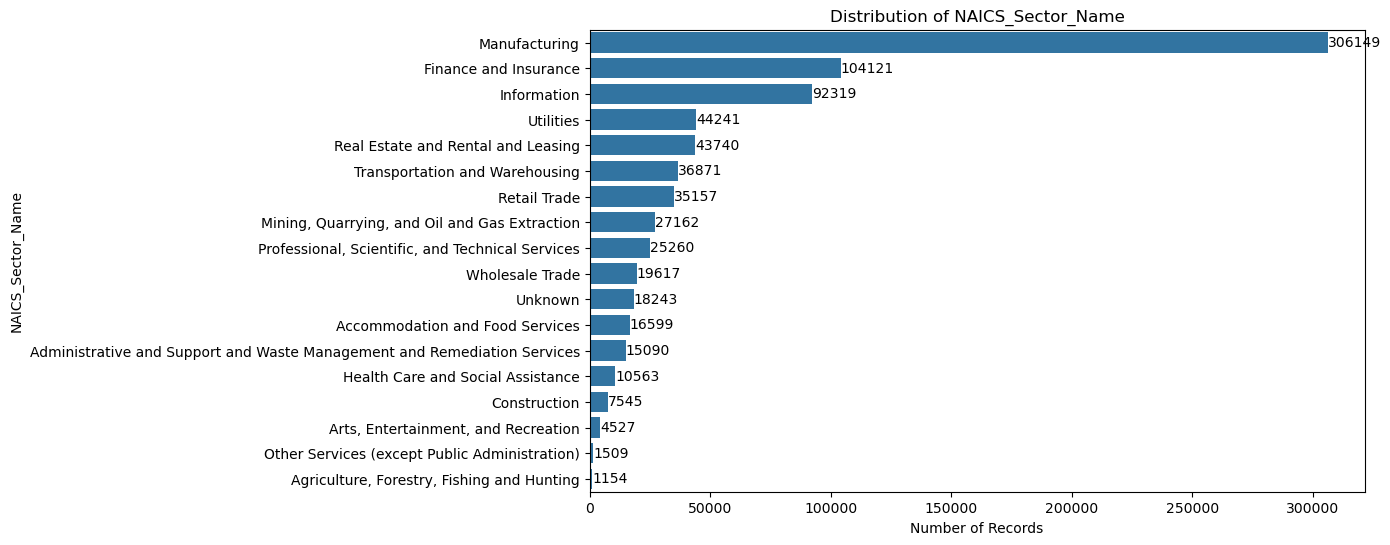

In [42]:
# Calculate the category counts and sort them in descending order
category_counts = crsp_and_comp_df["NAICS_Sector_Name"].value_counts().sort_values(ascending=False)

# Plot the counts distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=crsp_and_comp_df, y="NAICS_Sector_Name", order=category_counts.index)
plt.title("Distribution of NAICS_Sector_Name")
plt.xlabel("Number of Records")
plt.ylabel("NAICS_Sector_Name")

# Annotate the bars with the count values
for i, count in enumerate(category_counts):
    plt.text(count, i, f"{count}", ha="left", va="center", color="black")

plt.show()

# Review numtrd: Number of Trades

Daily: Number of Trades, Nasdaq contains the number of trades made on the Nasdaq Stock Market each date for a security. Trades on all exchanges are connected to Nasdaqs composite pricing network and all paper trades are included in the count. If the number of trades is unavailable, the field is set to 99.

## G1. Fill numtrd na with 99 as "Unknown"

In [43]:
crsp_and_comp_df["numtrd"] = crsp_and_comp_df["numtrd"].fillna("99")

# Review all remaining value related columns.

## H1. Drop all permno with less than 128 days of return

In [44]:
og_permno = crsp_and_comp_df['permno'].nunique()
permno_counts = crsp_and_comp_df['permno'].value_counts()
permno_to_keep = permno_counts[permno_counts >= 128].index
crsp_and_comp_df = crsp_and_comp_df[crsp_and_comp_df['permno'].isin(permno_to_keep)].reset_index(drop=True)

assert crsp_and_comp_df["permno"].value_counts().min() >= 128

new_permno = crsp_and_comp_df['permno'].nunique()
print("num_PERMNO_og: ", og_permno)
print("num_PERMNO_removed: ", og_permno - new_permno)
print("num_PERMNO_kept: ", new_permno)

num_PERMNO_og:  554
num_PERMNO_removed:  0
num_PERMNO_kept:  554


## H2. Forward fill trading values

In [45]:
fill_cols = [
    # Existing CRSP columns
    "vol", "shrout", "askhi", "ask", "bidlo", "bid", 
    "openprc", "prc", "cfacpr", "cfacshr",

    # "vwretd", "ewretd", "sprtrn", - Missing in joined dataset

    # Additional Compustat columns
    "atq", "ltq", "ceqq", "seqq", "cheq", "dlcq", "dlttq", "invtq", "ppentq",
    "revtq", "saleq", "cogsq", "xsgaq", "oiadpq", "niq",
    "capxy", "oancfy", "cshoq", "mkvaltq",
    "epsfxq"
]

# Convert the specified columns to numeric, coercing errors to NaN
crsp_and_comp_df[fill_cols] = crsp_and_comp_df[fill_cols].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [46]:
print("before forward fill")
for col in fill_cols:
  print(f"number of nulls in column {col}: ", len(crsp_and_comp_df[crsp_and_comp_df[col].isnull()]))

before forward fill
number of nulls in column vol:  1
number of nulls in column shrout:  0
number of nulls in column askhi:  1
number of nulls in column ask:  1
number of nulls in column bidlo:  1
number of nulls in column bid:  1
number of nulls in column openprc:  2
number of nulls in column prc:  1
number of nulls in column cfacpr:  0
number of nulls in column cfacshr:  0
number of nulls in column atq:  43578
number of nulls in column ltq:  43578
number of nulls in column ceqq:  43578
number of nulls in column seqq:  43578
number of nulls in column cheq:  43578
number of nulls in column dlcq:  96973
number of nulls in column dlttq:  45976
number of nulls in column invtq:  69173
number of nulls in column ppentq:  78910
number of nulls in column revtq:  68097
number of nulls in column saleq:  43481
number of nulls in column cogsq:  43859
number of nulls in column xsgaq:  165451
number of nulls in column oiadpq:  46391
number of nulls in column niq:  43481
number of nulls in column cap

In [47]:
# pick an example for visual inspection
review_idx = crsp_and_comp_df[crsp_and_comp_df["prc"].isnull()].index[0]
crsp_and_comp_df[crsp_and_comp_df["prc"].isnull()].iloc[0]

cusip                           09062X10
permno                             76841
date                 2020-11-06 00:00:00
bidlo                                NaN
askhi                                NaN
                            ...         
SHRCD_Type                             1
SHRCD_Detail                           1
NAICS_Sector                          32
NAICS_Secondary                   5414.0
NAICS_Sector_Name          Manufacturing
Name: 504809, Length: 355, dtype: object

In [48]:
# forward fill
for col in fill_cols:
  crsp_and_comp_df[col] = crsp_and_comp_df.groupby('permno')[col].ffill()

In [49]:
# visually inspect the example to ensure the price was forward filled correctly
crsp_and_comp_df.iloc[review_idx-1 : review_idx+1]["prc"]

504808    328.89999
504809    328.89999
Name: prc, dtype: float64

In [50]:
print("after forward fill")
for col in fill_cols:
  print(f"number of nulls in column {col}: ", len(crsp_and_comp_df[crsp_and_comp_df[col].isnull()]))

after forward fill
number of nulls in column vol:  0
number of nulls in column shrout:  0
number of nulls in column askhi:  0
number of nulls in column ask:  0
number of nulls in column bidlo:  0
number of nulls in column bid:  0
number of nulls in column openprc:  0
number of nulls in column prc:  0
number of nulls in column cfacpr:  0
number of nulls in column cfacshr:  0
number of nulls in column atq:  42899
number of nulls in column ltq:  42899
number of nulls in column ceqq:  42899
number of nulls in column seqq:  42899
number of nulls in column cheq:  42899
number of nulls in column dlcq:  51411
number of nulls in column dlttq:  43340
number of nulls in column invtq:  57173
number of nulls in column ppentq:  68084
number of nulls in column revtq:  67465
number of nulls in column saleq:  42849
number of nulls in column cogsq:  42849
number of nulls in column xsgaq:  163637
number of nulls in column oiadpq:  43416
number of nulls in column niq:  42849
number of nulls in column capx

## H3. If prc is still NaN, that means it was the first day the stock was listed on the exchange, drop these records since we cannot calculate the return for these days

In [51]:
crsp_and_comp_df.dropna(subset=["prc"], inplace=True)
crsp_and_comp_df.reset_index(drop=True, inplace=True)

In [52]:
print("after forward fill")
for col in fill_cols:
  print(f"number of nulls in column {col}: ", len(crsp_and_comp_df[crsp_and_comp_df[col].isnull()]))

after forward fill
number of nulls in column vol:  0
number of nulls in column shrout:  0
number of nulls in column askhi:  0
number of nulls in column ask:  0
number of nulls in column bidlo:  0
number of nulls in column bid:  0
number of nulls in column openprc:  0
number of nulls in column prc:  0
number of nulls in column cfacpr:  0
number of nulls in column cfacshr:  0
number of nulls in column atq:  42899
number of nulls in column ltq:  42899
number of nulls in column ceqq:  42899
number of nulls in column seqq:  42899
number of nulls in column cheq:  42899
number of nulls in column dlcq:  51411
number of nulls in column dlttq:  43340
number of nulls in column invtq:  57173
number of nulls in column ppentq:  68084
number of nulls in column revtq:  67465
number of nulls in column saleq:  42849
number of nulls in column cogsq:  42849
number of nulls in column xsgaq:  163637
number of nulls in column oiadpq:  43416
number of nulls in column niq:  42849
number of nulls in column capx

## H4. If ask, bid, openprc are still NaN, fill them with 0

In [53]:
crsp_and_comp_df["ask"] = crsp_and_comp_df["ask"].fillna(0)
crsp_and_comp_df["bid"] = crsp_and_comp_df["bid"].fillna(0)
crsp_and_comp_df["openprc"] = crsp_and_comp_df["openprc"].fillna(0)

In [54]:
print("confirm forward fill was complete")
for col in fill_cols:
  assert len(crsp_and_comp_df[crsp_and_comp_df[col].isnull()]) == 0

confirm forward fill was complete


AssertionError: 

## H5. If ret is NaN, calculate the ret based on forward filled PRICE

In [46]:
crsp_and_comp_df["ret"] = pd.to_numeric(crsp_and_comp_df['ret'], errors='coerce')
print(f"number of nulls in column ret: ", len(crsp_and_comp_df[crsp_and_comp_df["ret"].isnull()]))

number of nulls in column ret:  32


In [47]:
# pick an example for visual inspection
review_idx = crsp_and_comp_df[crsp_and_comp_df["ret"].isnull()].index[1]
crsp_and_comp_df[crsp_and_comp_df["ret"].isnull()].iloc[1]

cusip                      G9001E10
permno                        17131
date            2018-01-02 00:00:00
bidlo                         20.09
askhi                         21.79
                       ...         
trdstat                           A
primexch                          Q
secstat                           R
SHRCD_Type                        1
SHRCD_Detail                      2
Name: 151388, Length: 352, dtype: object

In [49]:
# Calculate previous day's price for each permno
crsp_and_comp_df['prev_price'] = crsp_and_comp_df.groupby('permno')['prc'].shift(1)

# Fill NaN values in the return column
crsp_and_comp_df['ret'] = crsp_and_comp_df.apply(
    lambda row: (row['prc'] / row['prev_price'] - 1) if pd.isnull(row['ret']) else row['ret'], axis=1
)

In [50]:
# visually inspect the example to ensure the return was calculated correctly
display(crsp_and_comp_df.iloc[review_idx-1 : review_idx+1]["permno"]) 
display(crsp_and_comp_df.iloc[review_idx-1 : review_idx+1]["prc"])
display(crsp_and_comp_df.iloc[review_idx-1 : review_idx+1]["prev_price"])
display(crsp_and_comp_df.iloc[review_idx-1 : review_idx+1]["ret"])

crsp_and_comp_df.drop(columns=['prev_price'], inplace=True)

151387    17130
151388    17131
Name: permno, dtype: int64

151387     7.34
151388    21.58
Name: prc, dtype: float64

151387    7.32
151388     NaN
Name: prev_price, dtype: float64

151387    0.002732
151388         NaN
Name: ret, dtype: float64

## H6. If ret is still NaN, that means the previous price is not in this subset of the dataset, fill RET with 0

In [55]:
print(f"number of nulls in column RET: ", len(crsp_and_comp_df[crsp_and_comp_df["ret"].isnull()]))

number of nulls in column RET:  32


In [56]:
crsp_and_comp_df["ret"] = crsp_and_comp_df["ret"].fillna(0)

In [58]:
assert len(crsp_and_comp_df[crsp_and_comp_df["ret"].isnull()]) == 0

## H7. Cast to appropriate type

In [61]:
int_cols = ["vol", "shrout", "numtrd"]
float_cols = [
    "askhi",
    "ask",
    "bidlo",
    "bid",
    "openprc",
    "prc",
    "ret",
    "cfacpr",
    "cfacshr",
    # "vwretd",
    # "ewretd",
    # "sprtrn",
]
str_cols = [
    "permno",
    "ncusip",
    "cusip",
    "ticker",
    "shrcd",
    "shrcd_type",
    "shrcd_detail",
    "exchcd",
    "comnam",
    "primexch",
    "trdstat",
    "secstat",
    "naics",
    "naics_sector",
    "naics_secondary",
]

In [62]:
crsp_and_comp_df[int_cols] = crsp_and_comp_df[int_cols].astype(int)
crsp_and_comp_df[float_cols] = crsp_and_comp_df[float_cols].astype(float)
crsp_and_comp_df[str_cols] = crsp_and_comp_df[str_cols].astype(str)

KeyError: "['ncusip', 'ticker', 'shrcd_type', 'shrcd_detail', 'comnam', 'naics_sector', 'naics_secondary'] not in index"

## H8. Remove outliers, permno that had more than 10 days of over 100% or under -50% returns

Return is calculated using (close_price/previous_close_price)-1.

In [64]:
# Define the conditions
over_100_percent = crsp_and_comp_df["ret"] > 1.0
under_50_percent = crsp_and_comp_df["ret"] < -0.5

# Create a boolean mask for the conditions
condition_mask = over_100_percent | under_50_percent

# Count the number of days each permno_id satisfies the condition
permno_counts = crsp_and_comp_df[condition_mask].groupby('permno').size()

In [65]:
# Filter out permno with more than 10 days satisfying the condition
to_remove = permno_counts[permno_counts > 10].index
print("num_PERMNO_removed: ", len(to_remove))

# Filter the DataFrame to exclude those PERMNO
og_len = len(crsp_and_comp_df)
crsp_and_comp_df = crsp_and_comp_df[~crsp_and_comp_df['permno'].isin(to_remove)]
new_len = len(crsp_and_comp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

num_PERMNO_removed:  0
num_records_removed:  0
num_records_kept:  809867


# Take another look at the null analysis

In [66]:
# Count the number of nulls in each column
null_counts = crsp_and_comp_df.isnull().sum()

# Calculate the percentage of nulls in each column
total_rows = len(crsp_and_comp_df)
null_percentages = (null_counts / total_rows) * 100

assert null_percentages.min() == 0.0

## I1. Remove duplicates

In [67]:
og_len = len(crsp_and_comp_df)
crsp_and_comp_df = crsp_and_comp_df.drop_duplicates()
new_len = len(crsp_and_comp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

num_records_removed:  0
num_records_kept:  809867


## I2. Confirm each permno contains at most num_days records (each permno only has one record per day)


In [68]:
num_days = crsp_and_comp_df["date"].nunique()

In [70]:
assert crsp_and_comp_df["permno"].value_counts().max() <= num_days

## I3. Rename & Reorder all columns

In [ ]:
# rename_dict = {
#     "date": "date",
#     "PERMNO": "permno_id",
#     "NCUSIP": "ncusip_id",
#     "CUSIP": "cusip_id",
#     "TICKER": "ticker",
#     "SHRCD": "share_code",
#     "SHRCD_Type": "share_code_type",
#     "SHRCD_Detail": "share_code_detail",
#     "EXCHCD": "exchange_code",
#     "COMNAM": "company_name",
#     "PRIMEXCH": "primary_exchange",
#     "TRDSTAT": "trading_status",
#     "SECSTAT": "security_status",
#     "NAICS": "naics",
#     "NAICS_Sector": "naics_sector",
#     "NAICS_Sector_Name": "naics_sector_name",
#     "NAICS_Secondary": "naics_secondary",
#     "ASKHI": "ask_or_high_price",
#     "ASK": "ask_price",
#     "BIDLO": "bid_or_low_price",
#     "BID": "bid_price",
#     "OPENPRC": "open_price",
#     "PRC": "close_price",
#     "RET": "return",
#     "VOL": "volume",
#     "SHROUT": "shares_outstanding",
#     "NUMTRD": "num_trades",
#     "CFACPR": "factor_to_adjust_price",
#     "CFACSHR": "factor_to_adjust_shares",
#     "vwretd": "value_weighted_return",
#     "ewretd": "equal_weighted_return",
#     "sprtrn": "return_on_SP_index",
# }

# crsp_df = crsp_df.rename(columns=rename_dict)
# crsp_df = crsp_df[list(rename_dict.values())]

# Sort DF to ensure date order

### Forward-fill:
    - financial statement items that don't change frequently
    - variables that, when missing, can reasonably be assumed to be the same as the last known value

In [27]:
# List of variables to forward-fill
vars_to_ffill = ['fyearq',  # Fiscal Year
                 'fyr',     # Fiscal Year-end Month
                 'cusip',   # Latest 8 letter security ID
                 'conm',    # Company Name
                 'acctstdq',# Accounting Standard (acctstdq)
                 'atq',     # Assets - Total
                 'ltq',     # Derivative Assets Long-Term
                 'ceqq',    # Common/Ordinary Equity - Total
                 'seqq'     # Stockholders Equity > Parent > Index Fundamental > Quarterly
                ]

In [28]:
# Null analysis recap before re
def null_analysis(df, columns):
    null_table = df[columns].isnull().sum().reset_index()
    null_table.columns = ["Column", "Null Values"]
    null_table["Percentage"] = (null_table["Null Values"] / len(df)) * 100
    return null_table.sort_values(by="Null Values", ascending=False).reset_index(drop=True)

# Perform null analysis before forward-fill
null_analysis_before = null_analysis(crsp_and_comp_df, vars_to_ffill)

In [29]:
# Sort df to prep for forward-fill
crsp_and_comp_df = crsp_and_comp_df.sort_values(['permno', 'date'])

# Perform forward-fill within each permno group
crsp_and_comp_df[vars_to_ffill] = crsp_and_comp_df.groupby('permno')[vars_to_ffill].ffill()

In [31]:
# Perform null analysis after forward-fill
null_analysis_after = null_analysis(crsp_and_comp_df, vars_to_ffill)

# Compare the results
comparison = pd.merge(null_analysis_before, null_analysis_after, on='Column', suffixes=('_before', '_after'))
comparison['Null_Reduction'] = comparison['Null Values_before'] - comparison['Null Values_after']
comparison['Percentage_Reduction'] = comparison['Percentage_before'] - comparison['Percentage_after']

# Sort by the reduction in null values
comparison_sorted = comparison.sort_values(by='Null_Reduction', ascending=False).reset_index(drop=True)

# Display the results
print("Null Analysis Before Forward-Fill:")
print(null_analysis_before)
print("\nNull Analysis After Forward-Fill:")
print(null_analysis_after)
print("\nComparison of Null Values Before and After Forward-Fill:")
print(comparison_sorted)

Null Analysis Before Forward-Fill:
     Column  Null Values  Percentage
0      seqq        45422    5.481823
1       ltq        45422    5.481823
2      ceqq        45422    5.481823
3       atq        45422    5.481823
4  acctstdq        43854    5.292586
5    fyearq        43814    5.287759
6       fyr        43814    5.287759
7      conm        43814    5.287759
8     cusip            0    0.000000

Null Analysis After Forward-Fill:
     Column  Null Values  Percentage
0      seqq        43926    5.301276
1       ltq        43926    5.301276
2      ceqq        43926    5.301276
3       atq        43926    5.301276
4  acctstdq        43854    5.292586
5    fyearq        43814    5.287759
6       fyr        43814    5.287759
7      conm        43814    5.287759
8     cusip            0    0.000000

Comparison of Null Values Before and After Forward-Fill:
     Column  Null Values_before  Percentage_before  Null Values_after  \
0      seqq               45422           5.481823         